По трем значениям случайного вектора (ξ, η, ω) : (1, 0, 1), (0, 1, 5), (1, 1, 2):

In [64]:
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

In [65]:
X = np.array([[1, 0],
              [0, 1],
              [1, 1]])

y = np.array([1, 5, 2])

In [66]:
def get_coef(ksi, nu):
    PSI_ = np.array([np.append(np.array([1]), ksi[i]) for i in range(ksi.shape[0])])
    Y_ = nu
    F_ = PSI_.T @ PSI_
    F_inv_ = np.linalg.inv(F_)
    betta_ = F_inv_ @ PSI_.T @ Y_
    return betta_

In [67]:
def E(Y, betta, ksi):
    return Y - ([prediction(betta, ksi[i]) for i in range(n)])

* a) найти уравнение линейной регрессии ω = aξ + bη

In [68]:
betta = get_coef(X, y)
print(f'{np.round(betta[0], 2)} + {np.round(betta[1], 2)}x1 + {np.round(betta[2], 2)}x2')

4.0 + -3.0x1 + 1.0x2


* b) найти уравнение ridge регрессии ω = aξ + bη, построить график CVSS и определить значение параметра регуляризации

In [69]:
ridge_model = Ridge(alpha=1.0, fit_intercept=False)
ridge_model.fit(X, y)
a, b = ridge_model.coef_
print(f"Уравнение ridge-регрессии: ω = {a:.2f}ξ + {b:.2f}η")

Уравнение ridge-регрессии: ω = 0.25ξ + 2.25η


In [70]:
# Задаем диапазон alpha (лучше в логарифмическом масштабе)
alphas = np.logspace(-4, 3, 500)  # от 10^-4 до 10^2

# RidgeCV с кросс-валидацией (по умолчанию LOOCV для малых данных)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X, y)

# Оптимальное alpha
best_alpha = ridge_cv.alpha_
print(f"Лучшее alpha: {best_alpha:.4f}")

# Коэффициенты модели
a, b = ridge_cv.coef_
print(f"Уравнение: ω = {a:.2f}ξ + {b:.2f}η")

Лучшее alpha: 0.0001
Уравнение: ω = -3.00ξ + 1.00η


C:\Users\123va\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


C:\Users\123va\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:110: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


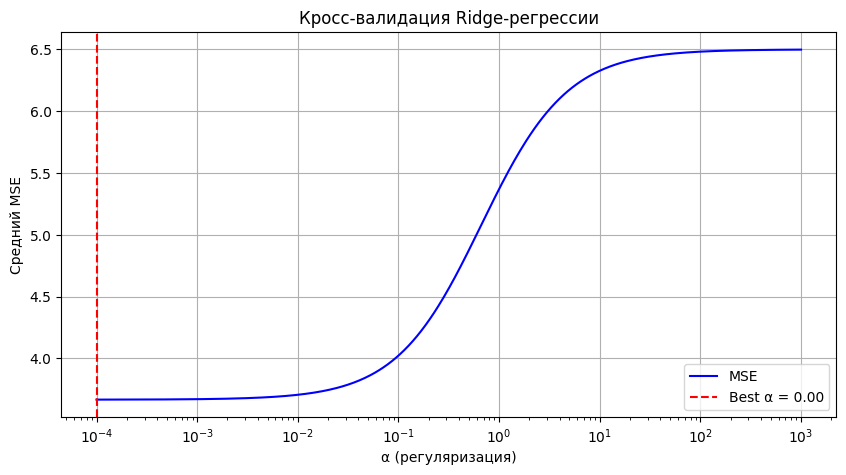

In [71]:
# Средний MSE для каждого alpha
mse_mean = ridge_cv.cv_values_.mean(axis=0)

plt.figure(figsize=(10, 5))
plt.semilogx(alphas, mse_mean, 'b-', label='MSE')
plt.axvline(best_alpha, color='r', linestyle='--', label=f'Best α = {best_alpha:.2f}')
plt.xlabel('α (регуляризация)')
plt.ylabel('Средний MSE')
plt.title('Кросс-валидация Ridge-регрессии')
plt.legend()
plt.grid(True)
plt.show()

* c) найти уравнение lasso регрессии ω = aξ + bη, построить график CVSS и определить значение параметра регуляризации

In [72]:
ridge_model = Lasso(alpha=1.0, fit_intercept=False)
ridge_model.fit(X, y)
a, b = ridge_model.coef_
print(f"Уравнение ridge-регрессии: ω = {a:.2f}ξ + {b:.2f}η")

Уравнение ridge-регрессии: ω = 0.00ξ + 2.00η


In [73]:
# Диапазон alpha (лучше в логарифмическом масштабе)
alphas = np.logspace(-4, 2, 100)  # от 10^-4 до 10^2

# LassoCV с кросс-валидацией
lasso_cv = LassoCV(alphas=alphas, cv=3, max_iter=10000)  # cv=3 для KFold(3)
lasso_cv.fit(X, y)

# Оптимальное alpha
best_alpha = lasso_cv.alpha_
print(f"Оптимальное alpha: {best_alpha:.4f}")

# Коэффициенты
a, b = lasso_cv.coef_
print(f"Уравнение: ω = {a:.2f}ξ + {b:.2f}η")

Оптимальное alpha: 0.0001
Уравнение: ω = -3.00ξ + 1.00η


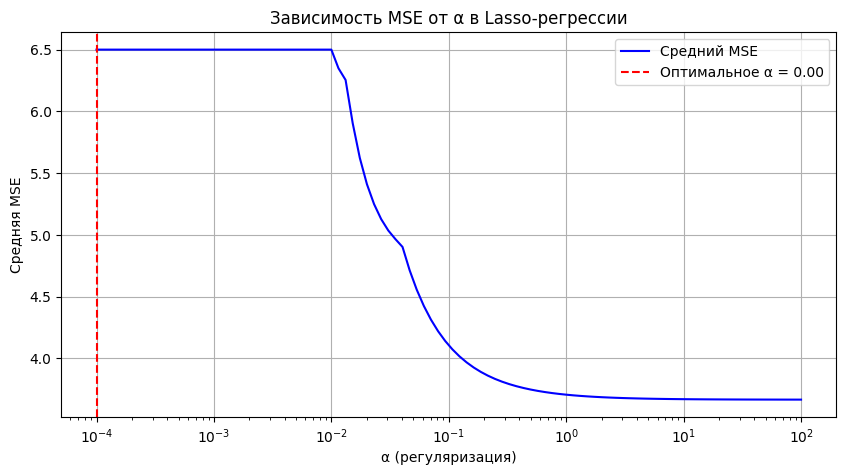

In [74]:
# Средний MSE для каждого alpha (используем mse_path_ из LassoCV)
mse_mean = lasso_cv.mse_path_.mean(axis=1)

plt.figure(figsize=(10, 5))
plt.semilogx(alphas, mse_mean, 'b-', label='Средний MSE')
plt.axvline(best_alpha, color='r', linestyle='--', label=f'Оптимальное α = {best_alpha:.2f}')
plt.xlabel('α (регуляризация)')
plt.ylabel('Средняя MSE')
plt.title('Зависимость MSE от α в Lasso-регрессии')
plt.legend()
plt.grid(True)
plt.show()